# ClearVision Challenge

## Image and Video dehazing using Deep Learning techniques

### Image Dehazing

In [5]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import random

In [6]:
clear_images_dir = '/Users/omvishal/Desktop/JP/ClearVision Challenge/archive 2/clear'
hazy_images_dir = '/Users/omvishal/Desktop/JP/ClearVision Challenge/archive 2/hazy'
meta_file_path = '/Users/omvishal/Desktop/JP/ClearVision Challenge/archive 2/metadata.csv'

In [7]:
meta_data = pd.read_csv(meta_file_path)

In [8]:
def sample_images(meta_data, sample_fraction=0.25):
    sample_size = int(len(meta_data) * sample_fraction)
    sampled_indices = random.sample(range(len(meta_data)), sample_size)
    return meta_data.iloc[sampled_indices]

sampled_meta_data = sample_images(meta_data, sample_fraction=0.25)

In [9]:
print(meta_data.columns)

Index(['image_id', 'clear_image_path', 'hazy_image_paths',
       'trans_image_paths'],
      dtype='object')


In [10]:
meta_data.columns = meta_data.columns.str.strip()

In [11]:
print(meta_data.head())

   image_id clear_image_path  \
0         1      clear/1.png   
1         2      clear/2.png   
2         3      clear/3.png   
3         4      clear/4.png   
4         5      clear/5.png   

                                    hazy_image_paths  \
0  ['hazy/1_1_0.90179.png', 'hazy/1_2_0.97842.png...   
1  ['hazy/2_1_0.99082.png', 'hazy/2_2_0.76381.png...   
2  ['hazy/3_1_0.88255.png', 'hazy/3_2_0.9726.png'...   
3  ['hazy/4_1_0.7483.png', 'hazy/4_2_0.92872.png'...   
4  ['hazy/5_1_0.85143.png', 'hazy/5_2_0.92675.png...   

                                   trans_image_paths  
0  ['trans/1_1.png', 'trans/1_2.png', 'trans/1_3....  
1  ['trans/2_1.png', 'trans/2_2.png', 'trans/2_3....  
2  ['trans/3_1.png', 'trans/3_2.png', 'trans/3_3....  
3  ['trans/4_1.png', 'trans/4_2.png', 'trans/4_3....  
4  ['trans/5_1.png', 'trans/5_2.png', 'trans/5_3....  


In [12]:
def display_sample_details(sampled_meta_data):
    print("Sampled Image Details:")
    for index, row in sampled_meta_data.iterrows():
        clear_img_path = row['clear_image_path']
        hazy_img_paths = eval(row['hazy_image_paths'])  
        
        print(f"Sample {index + 1}:")
        print(f"  Clear Image Path: {clear_img_path}")
        print(f"  Hazy Image Paths: {', '.join(hazy_img_paths)}")
        print("-" * 50)


display_sample_details(sampled_meta_data)

Sampled Image Details:
Sample 1163:
  Clear Image Path: clear/1163.png
  Hazy Image Paths: hazy/1163_1_0.88362.png, hazy/1163_2_0.711.png, hazy/1163_3_0.95329.png, hazy/1163_4_0.7626.png, hazy/1163_5_0.7486.png, hazy/1163_6_0.93545.png, hazy/1163_7_0.72312.png, hazy/1163_8_0.83175.png, hazy/1163_9_0.8637.png, hazy/1163_10_0.75812.png
--------------------------------------------------
Sample 118:
  Clear Image Path: clear/118.png
  Hazy Image Paths: hazy/118_1_0.81461.png, hazy/118_2_0.83908.png, hazy/118_3_0.74902.png, hazy/118_4_0.84765.png, hazy/118_5_0.93724.png, hazy/118_6_0.75559.png, hazy/118_7_0.9626.png, hazy/118_8_0.89101.png, hazy/118_9_0.72625.png, hazy/118_10_0.86013.png
--------------------------------------------------
Sample 1293:
  Clear Image Path: clear/1293.png
  Hazy Image Paths: hazy/1293_1_0.73251.png, hazy/1293_2_0.85086.png, hazy/1293_3_0.80867.png, hazy/1293_4_0.95145.png, hazy/1293_5_0.89607.png, hazy/1293_6_0.92999.png, hazy/1293_7_0.99304.png, hazy/1293_8_0.

In [13]:
# Function to load images using sampled metadata
def load_images_from_metadata(meta_data, base_dir):
    clear_images = []
    hazy_images = []
    
    for index, row in meta_data.iterrows():
        
        clear_img_path = os.path.join(base_dir, row['clear_image_path'])
        clear_img = load_img(clear_img_path, target_size=(256, 256))
        clear_img_array = img_to_array(clear_img) / 255.0
        clear_images.append(clear_img_array)
        
        
        hazy_img_paths = eval(row['hazy_image_paths']) 
        hazy_img_path = os.path.join(base_dir, hazy_img_paths[0])  
        hazy_img = load_img(hazy_img_path, target_size=(256, 256))
        hazy_img_array = img_to_array(hazy_img) / 255.0
        hazy_images.append(hazy_img_array)
    
    return np.array(hazy_images), np.array(clear_images)

In [14]:
base_dir = '/Users/omvishal/Desktop/JP/ClearVision Challenge/archive 2'
hazy_images, clear_images = load_images_from_metadata(sampled_meta_data, base_dir)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(hazy_images, clear_images, test_size=0.75, random_state=42)

In [16]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (87, 256, 256, 3), (87, 256, 256, 3)
Test set shape: (262, 256, 256, 3), (262, 256, 256, 3)


In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Input
from tensorflow.keras.models import Model

# Define U-Net architecture
def build_unet_model(input_shape):
    inputs = Input(input_shape)
    
    # Downsampling (Encoder)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2))(conv1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    pool3 = MaxPooling2D((2, 2))(conv3)
    
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    pool4 = MaxPooling2D((2, 2))(conv4)
    
    # Bottleneck
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    
    # Upsampling (Decoder)
    up6 = UpSampling2D((2, 2))(conv5)
    concat6 = concatenate([conv4, up6])
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(concat6)
    
    up7 = UpSampling2D((2, 2))(conv6)
    concat7 = concatenate([conv3, up7])
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(concat7)
    
    up8 = UpSampling2D((2, 2))(conv7)
    concat8 = concatenate([conv2, up8])
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat8)
    
    up9 = UpSampling2D((2, 2))(conv8)
    concat9 = concatenate([conv1, up9])
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat9)
    
    outputs = Conv2D(3, (1, 1), activation='sigmoid')(conv9)  # Sigmoid for normalized output
    
    model = Model(inputs, outputs)
    return model

input_shape = (256, 256, 3)
unet_model = build_unet_model(input_shape)

unet_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

unet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_3[0][0],   │
│ (Concatenate)       │ 1536)             │            │ up_sampling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │  7,078,400 │ concatenate[0][0] │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64, 64,    │          0 │ conv2d_2[0][0],   │
│ (Concatenate)       │ 768)              │            │ up_sampling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │  1,769,728 │ concatenate_1[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_2     │ (None, 128, 128,  │          0 │ conv2d_6[0][0]  

 Total params: 15,672,067 (59.78 MB)

 Trainable params: 15,672,067 (59.78 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = unet_model.fit(X_train, y_train, epochs= 50, batch_size=32, validation_split=0.1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 24s/step - accuracy: 0.3561 - loss: 0.0876 - val_accuracy: 0.6876 - val_loss: 0.0933
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 85s 26s/step - accuracy: 0.7754 - loss: 0.0870 - val_accuracy: 0.6924 - val_loss: 0.0814
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 86s 25s/step - accuracy: 0.7766 - loss: 0.0830 - val_accuracy: 0.6924 - val_loss: 0.0813
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 87s 25s/step - accuracy: 0.7855 - loss: 0.0819 - val_accuracy: 0.6924 - val_loss: 0.0824
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 102s 28s/step - accuracy: 0.7644 - loss: 0.0783 - val_accuracy: 0.3557 - val_loss: 0.0737
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 27s/step - accuracy: 0.4393 - loss: 0.0725 - val_accuracy: 0.6917 - val_loss: 0.0596
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 101s 27s/step - accuracy: 0.7728 - loss: 0.0657 - val_accuracy: 0.6924 - val_loss: 0.0776
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 93s 28s/step - accuracy: 0.7730 - loss: 0.0706 - val_accuracy: 0.6924 - val_loss: 0.057

In [78]:
train_loss, train_acc = unet_model.evaluate(X_train, y_train)

print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 9s/step - accuracy: 0.8386 - loss: 0.0174
Train Loss: 0.017593638971447945
Train Accuracy: 0.8310345411300659


In [19]:
test_loss, test_acc = unet_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 124s 14s/step - accuracy: 0.8306 - loss: 0.0179
Test Loss: 0.017377445474267006, Test Accuracy: 0.8373672366142273


In [20]:
predicted_images = unet_model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 119s 13s/step


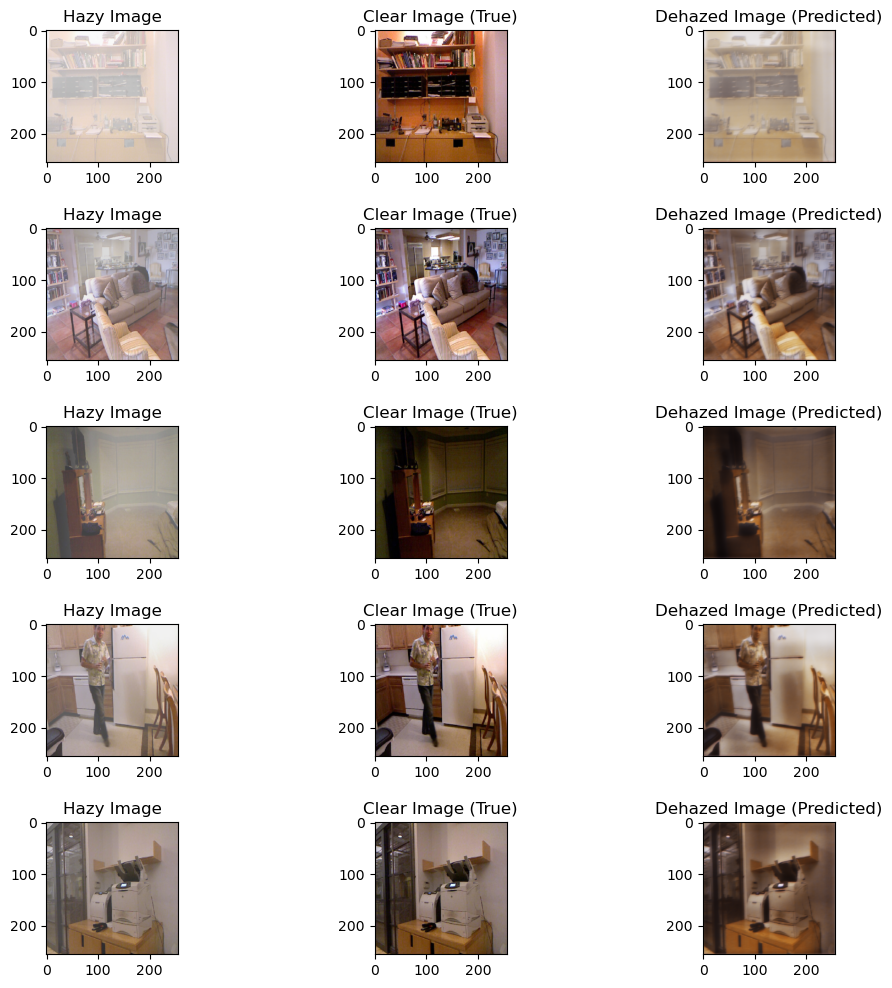

In [21]:
def display_sample_results(hazy_imgs, true_clear_imgs, predicted_imgs, num_samples=5):
    plt.figure(figsize=(12, 12))
    for i in range(num_samples):
        plt.subplot(num_samples, 3, 3*i+1)
        plt.imshow(hazy_imgs[i])
        plt.title('Hazy Image')
        
        plt.subplot(num_samples, 3, 3*i+2)
        plt.imshow(true_clear_imgs[i])
        plt.title('Clear Image (True)')
        
        plt.subplot(num_samples, 3, 3*i+3)
        plt.imshow(predicted_imgs[i])
        plt.title('Dehazed Image (Predicted)')

    plt.subplots_adjust(hspace=0.5)  # Adjust hspace for vertical spacing
    plt.show()

display_sample_results(X_test, y_test, predicted_images)

In [43]:
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

def calculate_metrics(true_images, predicted_images):
    psnr_values = []
    ssim_values = []
    
    for true_img, pred_img in zip(true_images, predicted_images):
        print(f"True Image Shape: {true_img.shape}, Predicted Image Shape: {pred_img.shape}")
        
        if true_img.shape[0] < 7 or true_img.shape[1] < 7:
            print("One of the images is too small for SSIM calculation.")
            continue 

        psnr = compare_psnr(true_img, pred_img)

        if true_img.shape == pred_img.shape:  
            try:
                # Explicitly set win_size to 3 or 5 and specify data_range
                ssim = compare_ssim(true_img, pred_img, multichannel=True, win_size=3, data_range=1)
            except ValueError as e:
                print(f"SSIM calculation error: {e}")
                ssim = np.nan  # Assign NaN to SSIM if there's an error
        else:
            print("Shape mismatch between true and predicted images.")
            ssim = np.nan  # Assign NaN if shapes do not match

        psnr_values.append(psnr)
        ssim_values.append(ssim)

    avg_psnr = np.nanmean(psnr_values)  
    avg_ssim = np.nanmean(ssim_values) 
    
    return avg_psnr, avg_ssim

In [45]:
predicted_images = unet_model.predict(X_test)
avg_psnr, avg_ssim = calculate_metrics(y_test, predicted_images)
print(f"Average PSNR: {avg_psnr:.2f}, Average SSIM: {avg_ssim:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shape: (256, 256, 3)
True Image Shape: (256, 256, 3), Predicted Image Shap

### Video Dehazing

In [49]:
labels_dir = '/Users/omvishal/Desktop/JP/ClearVision Challenge/dataset/labels'  
xls_file = f'{labels_dir}/ACMMM21_YoukuV1K_label.xls'  

xls = pd.ExcelFile(xls_file)

sheet_names = xls.sheet_names
print("Available sheets:", sheet_names)

sheets_data = {}
for sheet in sheet_names:
    sheets_data[sheet] = pd.read_excel(xls, sheet_name=sheet)
    print(f"\nContents of '{sheet}':")
    print(sheets_data[sheet].head())
    print(f"Shape of '{sheet}':", sheets_data[sheet].shape)


Available sheets: ['TrainSet', 'ValidationSet', 'TestSet']

Contents of 'TrainSet':
                                          video name  raw mos score  \
0  1137703281_03000C06035E4B5B8C28A415CCACF6415BF...       1.142857   
1  1137156504_03000C01005E490F20227465C7057F66625...       1.368421   
2  1125802412_03000B01005E19564DE4E8C4EFD6DC6451D...       1.200000   
3  03000B01005D7F0F2D2748346603281FE37543-B0A3-40...       1.500000   
4  1137494975_03000B01005E4A59DBB31A66E184375F9AC...       1.352941   

   corrected mos score       std  number of subjects  
0             1.098718  0.349927                  21  
1             1.280703  0.581335                  19  
2             1.175551  0.400000                  15  
3             1.500000  0.500000                  10  
4             1.136420  0.680932                  17  
Shape of 'TrainSet': (887, 5)

Contents of 'ValidationSet':
                                          video name  raw mos score  \
0  03000C01005DF3814F783EC5E

In [51]:
import cv2

def load_video_frames(video_path, max_frames=100, resize_shape=(128, 128)):
    frames = []
    cap = cv2.VideoCapture(video_path)
    
    count = 0
    while cap.isOpened() and count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Resize and normalize the frame
        frame = cv2.resize(frame, resize_shape)
        frame = frame / 255.0  # Normalize to [0, 1]
        frames.append(frame)
        count += 1
    
    cap.release()
    return np.array(frames)

def sample_and_load_frames(video_names, video_folder, sample_fraction=0.1):
    sampled_videos = np.random.choice(video_names, size=int(len(video_names) * sample_fraction), replace=False)
    all_frames = []

    for video_name in sampled_videos:
        video_path = os.path.join(video_folder, video_name)
        frames = load_video_frames(video_path)
        all_frames.append(frames)

    return np.concatenate(all_frames, axis=0)

train_video_folder_path = '/Users/omvishal/Desktop/JP/ClearVision Challenge/dataset/train'  
test_video_folder_path = '/Users/omvishal/Desktop/JP/ClearVision Challenge/dataset/test'  
val_video_folder_path = '/Users/omvishal/Desktop/JP/ClearVision Challenge/dataset/val'  

train_video_names = sheets_data['TrainSet']['video name'].tolist()
train_video_folder = sample_and_load_frames(train_video_names, train_video_folder_path)

val_video_names = sheets_data['ValidationSet']['video name'].tolist()
val_video_folder = sample_and_load_frames(val_video_names, val_video_folder_path)

test_video_names = sheets_data['TestSet']['video name'].tolist()
test_video_folder = sample_and_load_frames(test_video_names, test_video_folder_path)

print(f"Loaded {train_video_folder.shape[0]} frames from sampled training videos.")
print(f"Loaded {val_video_folder.shape[0]} frames from sampled validation videos.")
print(f"Loaded {test_video_folder.shape[0]} frames from sampled test videos.")

Loaded 8743 frames from sampled training videos.
Loaded 1000 frames from sampled validation videos.
Loaded 800 frames from sampled test videos.


In [52]:
excel_file = '/Users/omvishal/Desktop/JP/ClearVision Challenge/dataset/labels/ACMMM21_YoukuV1K_label.xls'

train_df = pd.read_excel(excel_file, sheet_name='TrainSet')
val_df = pd.read_excel(excel_file, sheet_name='ValidationSet')
test_df = pd.read_excel(excel_file, sheet_name='TestSet')

# Check the shape of each DataFrame
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (887, 5)
Validation set shape: (100, 5)
Test set shape: (85, 5)


In [53]:
print("\nMissing values in TrainSet:")
print(train_df.isnull().sum())

print("\nMissing values in ValidationSet:")
print(val_df.isnull().sum())

print("\nMissing values in TestSet:")
print(test_df.isnull().sum())


Missing values in TrainSet:
video name             0
raw mos score          0
corrected mos score    0
std                    0
number of subjects     0
dtype: int64

Missing values in ValidationSet:
video name             0
raw mos score          0
corrected mos score    0
std                    0
number of subjects     0
dtype: int64

Missing values in TestSet:
video name             0
raw mos score          0
corrected mos score    0
std                    0
number of subjects     0
dtype: int64


In [54]:
print("Train set preview:")
print(train_df.head())

print("\nValidation set preview:")
print(val_df.head())

print("\nTest set preview:")
print(test_df.head())

Train set preview:
                                          video name  raw mos score  \
0  1137703281_03000C06035E4B5B8C28A415CCACF6415BF...       1.142857   
1  1137156504_03000C01005E490F20227465C7057F66625...       1.368421   
2  1125802412_03000B01005E19564DE4E8C4EFD6DC6451D...       1.200000   
3  03000B01005D7F0F2D2748346603281FE37543-B0A3-40...       1.500000   
4  1137494975_03000B01005E4A59DBB31A66E184375F9AC...       1.352941   

   corrected mos score       std  number of subjects  
0             1.098718  0.349927                  21  
1             1.280703  0.581335                  19  
2             1.175551  0.400000                  15  
3             1.500000  0.500000                  10  
4             1.136420  0.680932                  17  

Validation set preview:
                                          video name  raw mos score  \
0  03000C01005DF3814F783EC5E0167C52C07EC6-0A5C-41...       3.068966   
1  03000801005DE233FC448D85D13DDACA1BA7B5-43B0-4B...     

In [59]:
print("\nSummary statistics for TrainSet:")
print(train_df.describe())

print("\nSummary statistics for ValidationSet:")
print(val_df.describe())

print("\nSummary statistics for TestSet:")
print(test_df.describe())


Summary statistics for TrainSet:
       raw mos score  corrected mos score         std  number of subjects
count     887.000000           887.000000  887.000000          887.000000
mean        3.013001             3.010758    0.646352           21.170237
std         0.881849             0.904760    0.132808            8.591382
min         1.000000             1.000000    0.000000            6.000000
25%         2.333333             2.333717    0.566584           12.000000
50%         3.037037             3.035682    0.642824           23.000000
75%         3.764615             3.777778    0.710023           29.000000
max         4.777778             4.892986    1.116286           40.000000

Summary statistics for ValidationSet:
       raw mos score  corrected mos score         std  number of subjects
count     100.000000           100.000000  100.000000          100.000000
mean        3.278474             3.295486    0.809133           27.930000
std         0.542980             0.5776

In [61]:
print("\nData types in TrainSet:")
print(train_df.dtypes)

print("\nData types in ValidationSet:")
print(val_df.dtypes)

print("\nData types in TestSet:")
print(test_df.dtypes)


Data types in TrainSet:
video name              object
raw mos score          float64
corrected mos score    float64
std                    float64
number of subjects       int64
dtype: object

Data types in ValidationSet:
video name              object
raw mos score          float64
corrected mos score    float64
std                    float64
number of subjects       int64
dtype: object

Data types in TestSet:
video name              object
raw mos score          float64
corrected mos score    float64
std                    float64
number of subjects       int64
dtype: object


In [63]:
# Load data from each sheet
train_df = pd.read_excel(excel_file, sheet_name='TrainSet')
val_df = pd.read_excel(excel_file, sheet_name='ValidationSet')
test_df = pd.read_excel(excel_file, sheet_name='TestSet')


train_sample = train_df.sample(frac=0.1, random_state=42)
val_sample = val_df.sample(frac=0.1, random_state=42)
test_sample = test_df.sample(frac=0.1, random_state=42)


print("Sampled Train set shape:", train_sample.shape)
print("Sampled Validation set shape:", val_sample.shape)
print("Sampled Test set shape:", test_sample.shape)


train_sample.to_csv('sampled_train.csv', index=False)
val_sample.to_csv('sampled_val.csv', index=False)
test_sample.to_csv('sampled_test.csv', index=False)

Sampled Train set shape: (89, 5)
Sampled Validation set shape: (10, 5)
Sampled Test set shape: (8, 5)



Correlation matrix for TrainSet:
                     raw mos score  corrected mos score       std  \
raw mos score             1.000000             0.998238  0.103306   
corrected mos score       0.998238             1.000000  0.105705   
std                       0.103306             0.105705  1.000000   
number of subjects        0.116776             0.115523  0.432679   

                     number of subjects  
raw mos score                  0.116776  
corrected mos score            0.115523  
std                            0.432679  
number of subjects             1.000000  


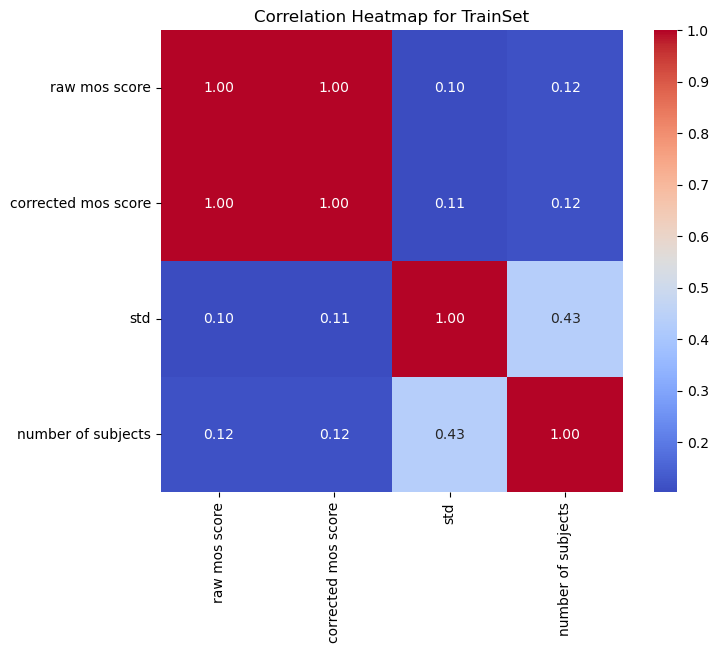

In [65]:
# Calculate the correlation matrix for numeric columns only
correlation_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

print("\nCorrelation matrix for TrainSet:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap for TrainSet")
plt.show()

Training frames shape: (8743, 128, 128, 3)
Validation frames shape: (1000, 128, 128, 3)
Test frames shape: (800, 128, 128, 3)


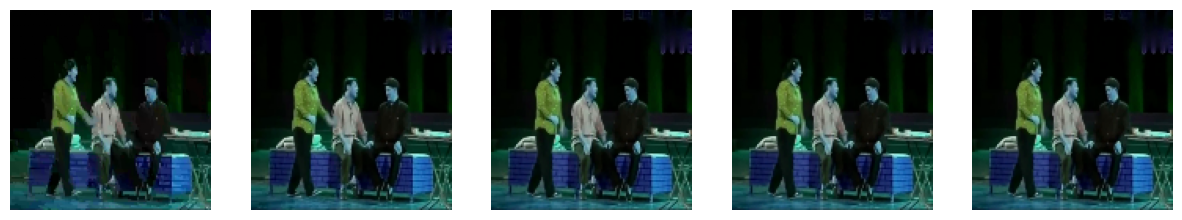

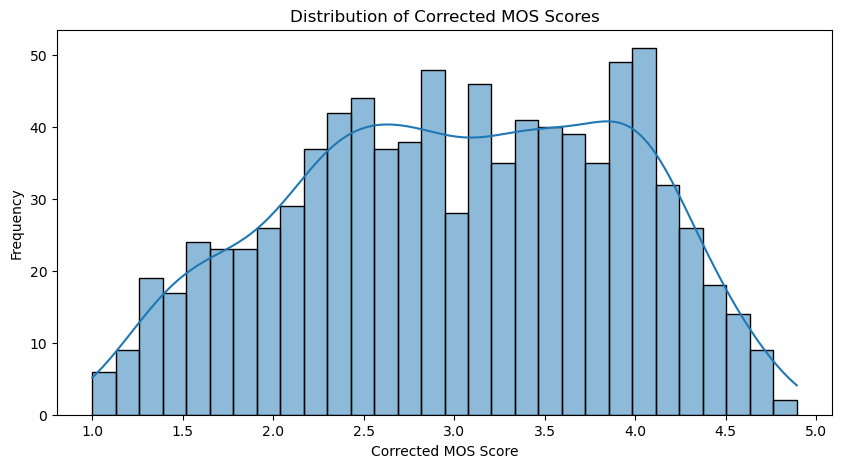

In [66]:
import matplotlib.pyplot as plt

def display_sample_frames(frames, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(frames[i])
        plt.axis('off')
    plt.show()

# Check shapes of the loaded frames
print(f"Training frames shape: {train_video_folder.shape}")
print(f"Validation frames shape: {val_video_folder.shape}")
print(f"Test frames shape: {test_video_folder.shape}")

# Display sample frames from the training set
display_sample_frames(train_video_folder)

# Analyze distribution of corrected MOS scores
import seaborn as sns

corrected_mos_scores = sheets_data['TrainSet']['corrected mos score']

plt.figure(figsize=(10, 5))
sns.histplot(corrected_mos_scores, bins=30, kde=True)
plt.title('Distribution of Corrected MOS Scores')
plt.xlabel('Corrected MOS Score')
plt.ylabel('Frequency')
plt.show()

In [80]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [118]:
from tensorflow.keras import layers, models

def build_generator():
    model = models.Sequential()
    model.add(layers.Input(shape=(128, 128, 3)))

    # Downsampling
    model.add(layers.Conv2D(64, (4, 4), strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (4, 4), strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (4, 4), strides=2, padding='same', activation='relu'))

    # Bottleneck
    model.add(layers.Conv2D(512, (4, 4), padding='same', activation='relu'))

    # Upsampling
    model.add(layers.Conv2DTranspose(256, (4, 4), strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(64, (4, 4), strides=2, padding='same', activation='relu'))

    # Output layer
    model.add(layers.Conv2D(3, (7, 7), padding='same', activation='sigmoid'))  # Sigmoid for normalized output

    return model

def build_discriminator():
    model = models.Sequential()
    model.add(layers.Input(shape=(128, 128, 3)))

    model.add(layers.Conv2D(64, (4, 4), strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (4, 4), strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (4, 4), strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (4, 4), strides=2, padding='same', activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Build the models
generator = build_generator()
discriminator = build_discriminator()

# Print model summaries
print(generator.summary())
print(discriminator.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 64, 64, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 512)    │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 32, 32, 256)    │     2,097,408 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 64, 64, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 128, 128, 64)   │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 128, 128, 3)    │         9,411 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,518,915 (21.05 MB)

 Trainable params: 5,518,915 (21.05 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 64, 64, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 32, 32, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 16, 16, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 8, 8, 512)      │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,789,313 (10.64 MB)

 Trainable params: 2,789,313 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

None


In [120]:
# Compile the Discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


discriminator.trainable = False  # Freeze the discriminator while training the GAN
gan_input = layers.Input(shape=(128, 128, 3))  # Input for the generator
generated_frame = generator(gan_input)  # Generate a frame
gan_output = discriminator(generated_frame)  # Pass the generated frame to the discriminator
gan = models.Model(gan_input, gan_output)

# Compile the GAN model
gan.compile(optimizer='adam', loss='binary_crossentropy')

print("Discriminator and GAN compiled successfully!")

Discriminator and GAN compiled successfully!


In [122]:
for layer in generator.layers:
    print(layer.trainable)

for layer in discriminator.layers:
    print(layer.trainable)

True
True
True
True
True
True
True
True
False
False
False
False
False
False


In [124]:
def train_gan(generator, discriminator, gan, train_frames, epochs=150, batch_size=32):
    half_batch = batch_size // 2
    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        # ---------------------
        # Train Discriminator
        # ---------------------
        
        # Select a random half batch of real frames
        idx = np.random.randint(0, train_frames.shape[0], half_batch)
        real_frames = train_frames[idx]

        # Generate a half batch of new frames
        noise = np.random.normal(0, 1, (half_batch, 128, 128, 3))
        generated_frames = generator.predict(noise)

        # Labels for real and fake frames
        real_labels = np.ones((half_batch, 1))  # Real frames labeled as 1
        fake_labels = np.zeros((half_batch, 1))  # Generated frames labeled as 0

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_frames, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_frames, fake_labels)

        # Extract losses and accuracy
        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])  # average loss
        d_accuracy = 0.5 * (d_loss_real[1] + d_loss_fake[1])  # average accuracy

        # ---------------------
        # Train Generator
        # ---------------------
        
        noise = np.random.normal(0, 1, (batch_size, 128, 128, 3))  # Noise for generator
        valid_labels = np.array([1] * batch_size)  # Labels for the generator to fool the discriminator

        # Train the generator
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Extract the generator loss
        g_loss_value = g_loss[0]  # Assuming g_loss is also a list and the first element is the loss

        # Store the losses
        d_losses.append(d_loss)
        g_losses.append(g_loss_value)

        # Print the progress
        if epoch % 10 == 0:
            print(f"{epoch} [D loss: {d_loss:.4f}, acc.: {100 * d_accuracy:.2f}%] [G loss: {g_loss_value:.4f}]")

    return d_losses, g_losses

# Train the GAN
d_losses, g_losses = train_gan(generator, discriminator, gan, train_video_folder, epochs=150, batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.6878, acc.: 75.00%] [G loss: 0.6959]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
10 [D loss: 0.7198, acc.: 50.90%] [G loss: 0.7214]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
20 [D loss: 0.7265, acc.: 50.31%] [G loss: 0.7272]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 5

In [126]:
def evaluate_gan(generator, discriminator, num_samples=100):

    noise = np.random.normal(0, 1, (num_samples, 128, 128, 3)) 

    generated_frames = generator.predict(noise)

    fake_labels = np.zeros((num_samples, 1))

    predictions = discriminator.predict(generated_frames)

    correct_predictions = np.sum(predictions > 0.5) 
    accuracy = correct_predictions / num_samples * 100

    print(f'Generator accuracy: {accuracy:.2f}%')

evaluate_gan(generator, discriminator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Generator accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


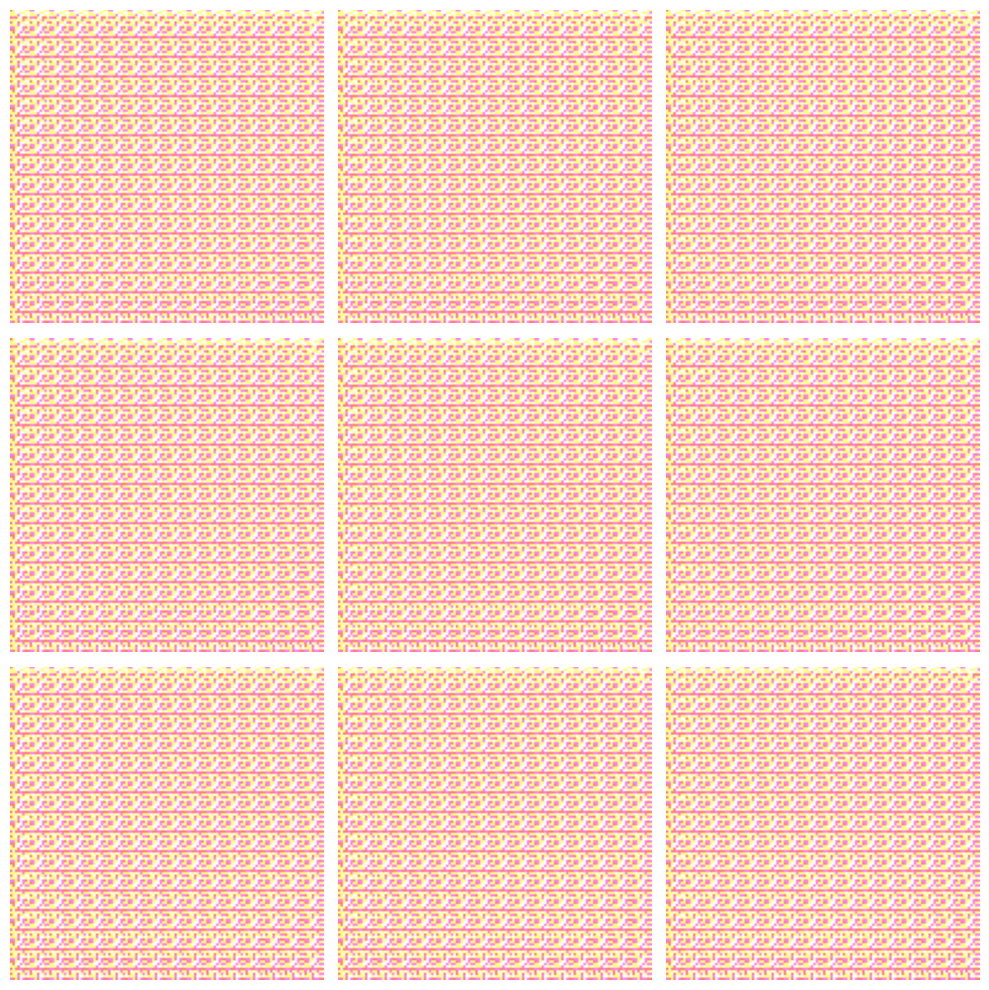

In [128]:
import matplotlib.pyplot as plt

def visualize_generated_frames(generator, num_frames=9):
    noise = np.random.normal(0, 1, (num_frames, 128, 128, 3))
    generated_frames = generator.predict(noise)

    plt.figure(figsize=(10, 10))
    for i in range(num_frames):
        plt.subplot(3, 3, i + 1)
        plt.imshow((generated_frames[i] + 1) / 2) 
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_generated_frames(generator)

In [130]:
test_video_directory = '/Users/omvishal/Desktop/JP/ClearVision Challenge/dataset/test'  
output_directory = '/Users/omvishal/Desktop/JP/ClearVision Challenge/dataset/result'
os.makedirs(output_directory, exist_ok=True)


def generate_dehazed_video(generator, video_path, output_path, frame_size=(128, 128)):
    # Open the input video
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 30, frame_size) 
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame for the generator
        resized_frame = cv2.resize(frame, frame_size)
        resized_frame = resized_frame / 255.0  
        resized_frame = np.expand_dims(resized_frame, axis=0) 
        
        # Generate dehazed frame
        dehazed_frame = generator.predict(resized_frame)[0]  
        
        # Denormalize and convert back to uint8
        dehazed_frame = (dehazed_frame * 255).astype(np.uint8)

        # Write the dehazed frame to the output video
        out.write(dehazed_frame)

    cap.release()
    out.release()

test_videos = [f for f in os.listdir(test_video_directory) if f.endswith(('.mp4', '.avi', '.mov'))][:10]  # Get first 10 videos

for video_file in test_videos:
    video_path = os.path.join(test_video_directory, video_file)
    output_path = os.path.join(output_directory, f"dehazed_{video_file}")
    generate_dehazed_video(generator, video_path, output_path)

print("Dehazing completed for the test videos.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [159]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import os

In [183]:
def calculate_temporal_consistency(dehazed_video_path):
    cap = cv2.VideoCapture(dehazed_video_path)
    temporal_diffs = []

    prev_frame = None

    while True:
        ret, current_frame = cap.read()
        if not ret:
            break
        
        if prev_frame is not None:
            # Calculate the difference between the current frame and the previous frame
            diff = cv2.absdiff(current_frame, prev_frame)
            # Calculate mean absolute error
            mae = np.mean(diff)
            temporal_diffs.append(mae)

        prev_frame = current_frame

    cap.release()

    avg_temporal_diff = np.mean(temporal_diffs)
    return avg_temporal_diff

# Calculate temporal consistency for each dehazed video
for video_file in test_videos:
    dehazed_video_path = os.path.join(output_directory, f"dehazed_{video_file}")
    avg_temporal_consistency = calculate_temporal_consistency(dehazed_video_path)
    print(f"Video: {video_file} | Avg Temporal Consistency (MAE): {avg_temporal_consistency:.2f}")

Video: 03000801005D5760B93F7BD566EFF64E3939B5-E943-4C8A-B501-8D481ED3A9C8.mp4 | Avg Temporal Consistency (MAE): 0.01
Video: 03000B01005D185AA0E239E45C2266A666716F-1C6C-4FC3-ADF2-F63885C66537.mp4 | Avg Temporal Consistency (MAE): 0.17
Video: 03000C01005D393E254D0FF5EE4BCB11AD6E8B-CCDD-49E2-9AAD-BBF05D6969DA.mp4 | Avg Temporal Consistency (MAE): 0.02
Video: 03000B01005DC6E5F4349FF456962EE6A52BC7-6A96-4095-82F7-A23C4A12A7E1.mp4 | Avg Temporal Consistency (MAE): 0.10
Video: 03000C01005CD9252B146EF58340693AB0C828-E723-4E3F-B342-79919502E84A.mp4 | Avg Temporal Consistency (MAE): 0.22
Video: 03000B01005DB5433128C7C6466347EB1EE42E-90F2-41FE-A7FA-A5D4B5E25B86.mp4 | Avg Temporal Consistency (MAE): 0.09
Video: 03000C01005CBEC0E0B0796456A6DF9B2D7D36-F1E7-43FE-9741-55D22F05BDDA.mp4 | Avg Temporal Consistency (MAE): 0.04
Video: 03000801005DBFF2B2CC67545E227788F921C8-94AA-4E25-A56C-4AE10009D962.mp4 | Avg Temporal Consistency (MAE): 0.13
Video: 03000B01005D1493426751A5EC687D2A8D7545-64F4-42E3-8429-9A6

In [171]:
from skimage.metrics import structural_similarity as ssim

def calculate_psnr_ssim(original_frame, dehazed_frame):
    # Resize dehazed frame to match the size of original frame
    dehazed_frame_resized = cv2.resize(dehazed_frame, (original_frame.shape[1], original_frame.shape[0]))

    # Check if both frames are at least 7x7 pixels
    if (original_frame.shape[0] < 7 or original_frame.shape[1] < 7 or 
        dehazed_frame_resized.shape[0] < 7 or dehazed_frame_resized.shape[1] < 7):
        print("One of the frames is too small for PSNR/SSIM calculation.")
        return None, None  # Return None for both metrics if the frame is too small

    # Calculate PSNR
    psnr_value = cv2.PSNR(original_frame, dehazed_frame_resized)

    # Calculate SSIM
    try:
        ssim_value = ssim(original_frame, dehazed_frame_resized, multichannel=True)
    except ValueError as e:
        print(f"SSIM calculation error: {e}")
        return None, None

    return psnr_value, ssim_value

In [173]:
# Main Evaluation Loop
for video_file in test_videos:
    original_video_path = os.path.join(test_video_directory, video_file)
    dehazed_video_path = os.path.join(output_directory, f"dehazed_{video_file}")

    # Extract frames from original and dehazed videos
    original_frames = extract_frames(original_video_path)
    dehazed_frames = extract_frames(dehazed_video_path)

    avg_psnr = []
    avg_ssim = []

    # Gather metrics
    for orig_frame, dehazed_frame in zip(original_frames, dehazed_frames):
        # Print frame sizes for debugging
        print(f"Original frame size: {orig_frame.shape}, Dehazed frame size: {dehazed_frame.shape}")
        
        psnr_value, ssim_value = calculate_psnr_ssim(orig_frame, dehazed_frame)

        if psnr_value is not None and ssim_value is not None:
            avg_psnr.append(psnr_value)
            avg_ssim.append(ssim_value)

    # Calculate averages
    if avg_psnr and avg_ssim:
        mean_psnr = np.mean(avg_psnr)
        mean_ssim = np.mean(avg_ssim)
        print(f"Video: {video_file} | Avg PSNR: {mean_psnr:.2f} dB | Avg SSIM: {mean_ssim:.4f}")
    else:
        print(f"Video: {video_file} | Not enough valid frames for PSNR and SSIM calculations.")

    avg_temporal_consistency = calculate_temporal_consistency(dehazed_video_path)  # Ensure this function is defined
    print(f"Video: {video_file} | Avg Temporal Consistency (MAE): {avg_temporal_consistency:.2f}")


Original frame size: (1080, 1920, 3), Dehazed frame size: (128, 128, 3)
SSIM calculation error: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
Original frame size: (1080, 1920, 3), Dehazed frame size: (128, 128, 3)
SSIM calculation error: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
Original frame size: (1080, 1920, 3), Dehazed frame size: (128, 128, 3)
SSIM calculation error: win_size exceeds image extent. Either ensure that your images 